# **Simulated Experiment:** Calibration in the Presence of Flux Suppression
### **Author:** Brian Welman
### **Date:** June 2023
---
## Purpose of this Notebook

This Jupyter notebook serves as a companion to my Master of Science thesis, *"Calibration with Kalman Filtering and Smoothing: A New Framework for Modernizing Calibration Techniques"*. It provides a simulated environment to investigate and run an experiment focusing on the phenomenon of flux suppression encountered during radio interferometry.

The simulation is combined with a generic, direction-independent, time-only calibration scenario, with the primary objective being to generate the necessary results for the application section of my thesis.

---
## What You Will Find

In this notebook, you'll find a detailed walkthrough of:

1. Simulating a calibration environment
2. Conducting multiple calibration runs
3. Performing a specialized form of imaging
4. Generating plots and FITS files for results visualization

---
## Before You Begin

Please ensure you've checked the README in the GitHub repository for instructions on setting up and running the simulation.

<div class="alert alert-block alert-success"><b>Note:</b> This simulation is intended to serve as an academic example and may not be applicable for all calibration scenarios encountered in radio interferometry. Feel free to adapt and modify the code as needed to suit your specific requirements.</div>

<div class="alert alert-block alert-warning">
<b>Important:</b> As a redundancy feature, all important files and folders, including configuration files, data files/folders, plots, and so forth, that will be generated for a given function call or cell execution will prompt a response from the user whether the original files should be replaced, if they exist. There are several places where this feature can be manually turned off and will be labelled accordingly.
</div>


---
## 1. Simulation Setup

The contents of this section relates to the setup and settings specific to this simulation. Each simulation notebook can facilitate multiple different simulations at the same time, however, it is suggested to keep one simulation per simulation notebook to avoid complications. 

### 1.1 Configure `IPython` Modules

Below loads and sets the various aspects related to the `IPython` module.

In [106]:
# Load magic modules
%reload_ext autoreload
%reload_ext jupyternotify

# Auto-reload python code before each execution
%autoreload 2

<IPython.core.display.Javascript object>

### 1.2 Configure Notebook

The code below assists with `jupyter-notebook` related conifgurations. 

<div class="alert alert-block alert-warning">
<b>Important:</b> The notebook works best when the screen width is set wider, which can be done by executing the cell below. If the outputs are cleared, you can simply rerun the cell below to restore the width.
</div>


In [107]:
from IPython.display import display, HTML

# Make the cells the width of the screen
display(HTML("<style>.container { width:100% !important; }</style>"))

### 1.3 Create or Load Settings

This sets the core settings for the simulation. That is, the specific locations/paths, labels, parameters, and options for the various aspects of the simulation. The user is welcome to change them as they like. It allows for the persistence of certain parameters and settings per simulation.

<div class="alert alert-block alert-danger">
<b>Caution:</b> If changes are made to the settings, please press the <b>save</b> file button to retain them. If you want to load settings, simply press the <b>load</b> button and the settings should be loaded (given that it is present).
</div>

Below, the main entry point for the script is given by `script_settings` function. It takes the path to the main configuration file for the simulation as a YAML file. If you created a new simulation, please find the relevant configuration YAML file contained within the simulation with the associated name used to generate the directory. If you are using the main repository as your simulation location, you can simply use the file `meerkat-src-100-config.yml` as a start point. This file ensures that the correct simulation is selected and the correct settings, data and parameters associated with the simulation are used. 

<div class="alert alert-block alert-success"><b>Note:</b> Replace the <code>"&lt;INSERT CONFIG SCRIPT HERE&gt;"</code> with a string input of the path to the configuration file.</div>



In [108]:
from source.script import script_settings

script_options = script_settings("meerkat-src-100-config.yml")

Once the script settings are to your liking, they can be fed into the `setup_simulation` function to create the relevant directories and files according to these settings. From this point onwards, a log file is generated and stored in main directory labelled `simulation.log`. It will detail all the function calls used throughout the script and other useful debugging information.

<div class="alert alert-block alert-success"><b>Note:</b> Feed <code>script_options</code> into <code>setup_simulation</code>. There is an additional flag parameter <code>cleanup</code> that can be set. If set, then existing directories and files will be flagged for deletion, but for caution, it will require a response whether this action should be done or not.</div>

<div class="alert alert-block alert-danger">
    <b>Caution:</b> Regardless whether the <code>cleanup</code> flag is set, running this function will prompt for deletion of parameter information if any existing parameters that is stored in <code>"&lt;config_dir&gt;/params.config"</code> is present, where <code>config_dir</code> is the path to your configuration file directory given in the script settings. This is important to not delete if you wish to keep your simulation global parameters alive per session. If this is the case, select <b>n</b> everytime. If are completely deleting and reseting the simulation or this information in particular, then select <b>y</b>. If this is done, rerun all relevant functions below without replacing existing files. This will update the parameter information with associated settings and function calls.
</div>


In [109]:
from source.script import setup_simulation

params = setup_simulation(script_options, cleanup=True)

[2023-07-24 18:06:52,550 | INFO | source.script] Fetching directory paths
[2023-07-24 18:06:52,551 | WARNING | source.other] The following `1` files/folders already exist:
[2023-07-24 18:06:52,553 | WARNING | source.other] Delete? `meerkat-src-100/config/params.config`


Do you wish to replace it? (y/n) n


[2023-07-24 18:06:55,646 | INFO | source.script] Using saved parameter data
[2023-07-24 18:06:55,680 | INFO | source.script] Creating directory paths
[2023-07-24 18:06:55,685 | WARNING | source.other] The following `26` files/folders already exist:
[2023-07-24 18:06:55,686 | WARNING | source.other] Delete? `meerkat-src-100`
[2023-07-24 18:06:55,687 | WARNING | source.other] Delete? `meerkat-src-100/config`
[2023-07-24 18:06:55,687 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100`
[2023-07-24 18:06:55,688 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/gains`
[2023-07-24 18:06:55,689 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/gains/true`
[2023-07-24 18:06:55,690 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/gains/kalcal-diag/filter`
[2023-07-24 18:06:55,691 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/gain

Do you wish to replace it? (y/n) n


[2023-07-24 18:06:56,645 | INFO | source.script] Making directories
[2023-07-24 18:06:56,663 | INFO | source.script] Setting thread count to 4
[2023-07-24 18:06:56,665 | INFO | source.script] Setting random state seed to 20210331
[2023-07-24 18:06:56,666 | INFO | source.script] Matplotlib config directory unchanged
[2023-07-24 18:06:56,667 | INFO | source.script] Simulation setup complete


The output of `setup_simulation`, i.e., `params` is the most important parameter information file within the script. It will contain all the deduced user settings and other important information to be used throughout the simulation. This can range from how the data is simulated, where to find certain data files/folders, allowing for calibration and imaging runs, and performing the necessary actions to create plots.

The variable can be accessed like a Python dictionary through the use of keys. It will be up to the user to find the required information they need, but it is designed for easy viewing if the variable is printed to screen, i.e., `print(params)`. The user is also welcome to store data within the parameter file if need be. If this information is only required for a session or cell, then you can use it as a normal dictionary in this context. If you wish to save this custom parameter information, execute `params.save()` to push all the new changes to file. 

If a function call says there is missing keys, it is often easier to rerun previous function calls (without deleting the generated data and settings) to correct this, e.g., `setup_plotting` to reset the plotting information, `create_empty_measurement_set` to reset measurement set information, or 

<div class="alert alert-block alert-danger">
    <b>Caution:</b> When assigning new variables to <code>params</code> or saving the custom entries to file, there is no check done to see if things are overwritten. It is suggested to use a separate entry as <code>params["custom"] = {}</code> and populate this dictionary with the user's custom parameter information. Ensure to call `params.save()` to save these custom parameters to file. 
</div>

<div class="alert alert-block alert-success"><b>Note:</b> To see the contents of <code>params</code>, execute the cell below. Note, it can be large so caution is advised.</div>

In [5]:
print(params)

meerkat-src-100/config/params.config:
│   ├──  mpl-dir: ""
│   ├──  n-cpu: 4
│   ├──  paths: 
│   │   ├──  config: 
│   │   │   ├──  dir: meerkat-src-100/config
│   │   │   ├──  files: 
│   │   ├──  data: 
│   │   │   ├──  dir: /net/sinatra/vault2-tina/welman/meerkat-src-100
│   │   │   ├──  files: 
│   │   ├──  fits: 
│   │   │   ├──  dir: /net/sinatra/vault2-tina/welman/meerkat-src-100/fits
│   │   │   ├──  files: 
│   │   │   ├──  kalcal-diag: 
│   │   │   │   ├──  dir: /net/sinatra/vault2-tina/welman/meerkat-src-100/fits/kalcal-diag
│   │   │   │   ├──  files: 
│   │   │   │   ├──  filter: 
│   │   │   │   │   ├──  dir: /net/sinatra/vault2-tina/welman/meerkat-src-100/fits/kalcal-diag/filter
│   │   │   │   │   ├──  files: 
│   │   │   │   │   ├──  template: diag-filter-{itype}-{mp}mp-sigma_f-{sigma_f}.fits
│   │   │   │   ├──  smoother: 
│   │   │   │   │   └──  dir: /net/sinatra/vault2-tina/welman/meerkat-src-100/fits/kalcal-diag/smoother
│   │   │   │   │   └──  files: 
│   │   │

In [110]:
from source.script import all_settings

params, options = all_settings(params)

In [51]:
import numpy as np

# tints = np.array([1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 
#                   48, 52, 56, 60, 64, 68, 72, 74, 80, 88, 96, 104, 112, 128, 132, 144, 152, 160, 168, 
#                   176, 184, 192, 200, 208, 212, 224, 232, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 432, 
#                  464, 496, 528, 560, 592, 624, 656, 688, 720])

tints = np.arange(12, 372, 12)
tints = np.insert(tints, len(tints), 720)
tints = np.insert(tints, 0, 8)
tints = np.insert(tints, 0, 4)
tints = np.insert(tints, 0, 1)

# tints = [1, 2, 3, 4, 5, 6, 7, 8, 9] + \
#     list(range(10, 39, 2)) + \
#     list(range(40, 121, 4)) + \
#     list(range(128, 321, 8))

print(len(tints))
", ".join(map(str, tints))

34


'1, 4, 8, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300, 312, 324, 336, 348, 360, 720'

In [53]:
from source.plotting import setup_plotting

# Setup plotting
setup_plotting(options["plots"], params)

[2023-07-24 14:00:50,548 | INFO | source.plotting] Retrieving plotting options
[2023-07-24 14:00:50,550 | INFO | source.plotting] Updating parameter data


In [54]:
from source.data import create_empty_measurement_set

# Create measurement set
create_empty_measurement_set(options["ms"], params, verbose=True)

[2023-07-24 14:00:52,510 | INFO | source.data] Name/Path: `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`
[2023-07-24 14:00:52,511 | INFO | source.data] Telescope: meerkat
[2023-07-24 14:00:52,512 | INFO | source.data] Right Ascension: 11h50m15s
[2023-07-24 14:00:52,513 | INFO | source.data] Declination: -30d27m43s
[2023-07-24 14:00:52,514 | INFO | source.data] Synthesis-Time: 2 hr
[2023-07-24 14:00:52,515 | INFO | source.data] Integration-Time: 10 s
[2023-07-24 14:00:52,516 | INFO | source.data] Initial Frequency: 1GHz
[2023-07-24 14:00:52,518 | WARNING | source.other] The following `1` files/folders already exist:
[2023-07-24 14:00:52,519 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`


Do you wish to replace it? (y/n) y


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

[2023-07-24 14:00:53,572 | INFO | source.data] Create measurement set with `simms`
[2023-07-24 14:01:17,824 | INFO | source.data] New measurement set created at `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`
[2023-07-24 14:01:17,826 | INFO | source.data] Updating path and parameter data


In [55]:
from source.data import create_gains_signal

# Create true gains signal
create_gains_signal(options["gains"], params)

[2023-07-24 14:01:17,858 | INFO | source.data] Setting seed to 20210331
[2023-07-24 14:01:17,859 | INFO | source.data] Updating path data
[2023-07-24 14:01:17,905 | WARNING | source.other] The following `1` files/folders already exist:
[2023-07-24 14:01:17,906 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/gains/true/true-gains.npz`


Do you wish to replace it? (y/n) y


[2023-07-24 14:02:09,047 | INFO | source.data] Creating new true gains
[2023-07-24 14:02:09,049 | INFO | source.data] Retrieving information from `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`
[2023-07-24 14:02:09,142 | INFO | source.data] Calculating dimensions and axes
[2023-07-24 14:02:09,214 | INFO | source.data] Generating full-complex gains
[2023-07-24 14:02:09,340 | INFO | source.data] Codex shape: (N_ant, N_time, N_chan, N_dir, N_corr) = (720, 64, 1, 1, 1)
[2023-07-24 14:02:09,342 | INFO | source.data] Saving gains to file
[2023-07-24 14:02:09,351 | INFO | source.data] New simulated gains at `/net/sinatra/vault2-tina/welman/meerkat-src-100/gains/true/true-gains.npz`


In [56]:
from source.data import create_skymodels

# Create sky models
create_skymodels(options["vis"], params)

[2023-07-24 14:02:09,382 | INFO | source.data] Setting seed to 20210331
[2023-07-24 14:02:09,383 | INFO | source.data] Updating path data
[2023-07-24 14:02:09,385 | INFO | source.data] Fetching skymodel information
[2023-07-24 14:02:09,430 | WARNING | source.other] The following `4` files/folders already exist:
[2023-07-24 14:02:09,431 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-100mp.npz`
[2023-07-24 14:02:09,432 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-70mp.npz`
[2023-07-24 14:02:09,433 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-40mp.npz`
[2023-07-24 14:02:09,434 | WARNING | source.other] Delete? `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-10mp.npz`


Do you wish to replace it? (y/n) y


[2023-07-24 14:02:11,125 | INFO | source.data] Creating new true fluxes
[2023-07-24 14:02:11,395 | INFO | source.data] Determining flux and layout information
[2023-07-24 14:02:12,101 | INFO | source.data] Creating model images
[2023-07-24 14:02:12,103 | INFO | source.data] Saving model image to `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-100mp.npz`
[2023-07-24 14:02:12,149 | INFO | source.data] Saving model image to `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-70mp.npz`
[2023-07-24 14:02:12,175 | INFO | source.data] Saving model image to `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-40mp.npz`
[2023-07-24 14:02:12,199 | INFO | source.data] Saving model image to `/net/sinatra/vault2-tina/welman/meerkat-src-100/fluxes/true/model-10mp.npz`
[2023-07-24 14:02:12,223 | INFO | source.data] Updating parameter information


In [111]:
from source.data import create_visibilities

# Create visibilities
create_visibilities(options["vis"], params)

[2023-07-24 18:07:12,347 | INFO | source.data] Setting seed to 20210331
[2023-07-24 18:07:12,349 | INFO | source.data] Fetching visibility information
[2023-07-24 18:07:12,674 | INFO | source.data] Load the true-gains data
[2023-07-24 18:07:12,689 | INFO | source.data] Generating visibilities
[2023-07-24 18:07:14,003 | INFO | source.data] Saving 100MP visibilities to `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`
[2023-07-24 18:07:14,006 | INFO | source.data] Measured Visibilities: 'DATA_100MP'
[2023-07-24 18:07:14,007 | INFO | source.data] Clean Measured Visibilities: 'CLEAN_100MP
[2023-07-24 18:07:14,008 | INFO | source.data] True/Model Visibilities: 'MODEL_100MP
[2023-07-24 18:07:14,010 | INFO | source.data] Noise Term: 'NOISE_100MP
[2023-07-24 18:07:14,033 | WARNING | source.data] Column `MODEL_100MP` exists


Replace `MODEL_100MP`? (y/n/a) a


[2023-07-24 18:07:15,491 | INFO | source.data] Replace all columns
[2023-07-24 18:07:17,249 | INFO | source.data] Saving 70MP visibilities to `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`
[2023-07-24 18:07:17,250 | INFO | source.data] Measured Visibilities: 'DATA_70MP'
[2023-07-24 18:07:17,251 | INFO | source.data] Clean Measured Visibilities: 'CLEAN_70MP
[2023-07-24 18:07:17,252 | INFO | source.data] True/Model Visibilities: 'MODEL_70MP
[2023-07-24 18:07:17,253 | INFO | source.data] Noise Term: 'NOISE_70MP
[2023-07-24 18:07:19,000 | INFO | source.data] Saving 40MP visibilities to `/net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms`
[2023-07-24 18:07:19,001 | INFO | source.data] Measured Visibilities: 'DATA_40MP'
[2023-07-24 18:07:19,002 | INFO | source.data] Clean Measured Visibilities: 'CLEAN_40MP
[2023-07-24 18:07:19,003 | INFO | source.data] True/Model Visibilities: 'MODEL_40MP
[2023-07-24 18:07:19,003 | INFO | source.data] Noise Term: 'NOISE_40MP
[2023-07-24

In [78]:
from source.imaging import run_true_flux_extractor

run_true_flux_extractor(params, overwrite=True)

[2023-07-14 20:28:49,647 | INFO | source.imaging] Setting seed to 31032021
[2023-07-14 20:28:49,661 | INFO | source.imaging] Overwriting previous solutions and images
[2023-07-14 20:28:58,981 | INFO | source.imaging] Completed true images on 100MP
[2023-07-14 20:29:08,176 | INFO | source.imaging] Completed true images on 90MP
[2023-07-14 20:29:17,429 | INFO | source.imaging] Completed true images on 80MP
[2023-07-14 20:29:26,599 | INFO | source.imaging] Completed true images on 70MP
[2023-07-14 20:29:26,601 | INFO | source.imaging] Flux extractor complete


In [58]:
import numpy as np
from matplotlib import pyplot as plt
from casacore.tables import table

with table(str(params["paths"]["data"]["ms"])) as tb:
    model_100 = tb.getcol("MODEL_100MP").flatten()
    noise_100 = tb.getcol("NOISE_100MP").flatten()
    data_100 = tb.getcol("DATA_100MP").flatten()
    model_75 = tb.getcol("MODEL_70MP").flatten()
    model_50 = tb.getcol("MODEL_40MP").flatten()
    model_25 = tb.getcol("MODEL_10MP").flatten()
    
n_row = model_100.size
baselines = np.arange(n_row)

print(f"SNR={np.square(np.abs(data_100)).sum()/np.square(np.abs(noise_100)).sum()}")
for i, model in enumerate([model_100, model_75, model_50, model_25]):
    print(f"{100 * (1 - i/4):.2f}: R={np.square(np.abs(model)).sum()/np.square(np.abs(model_100)).sum()}")


Successful readonly open of default-locked table /net/sinatra/vault2-tina/welman/meerkat-src-100/meerkat.ms: 41 columns, 1451520 rows
SNR=2.2529680728912354
100.00: R=1.0
75.00: R=0.9358604550361633
50.00: R=0.7348636388778687
25.00: R=0.3352218568325043


[2023-07-24 14:02:32,520 | INFO | source.plotting] Setting seed to 20210331
[2023-07-24 14:02:32,522 | INFO | source.plotting] Load the true-gains data
[2023-07-24 14:02:32,529 | INFO | source.plotting] Creating plot
[2023-07-24 14:02:32,531 | INFO | source.plotting] Setting up axes and figure
[2023-07-24 14:02:32,810 | INFO | source.plotting] Configuring axes
[2023-07-24 14:02:32,831 | INFO | source.plotting] Figure and axes setup complete
[2023-07-24 14:02:32,833 | INFO | source.plotting] Plotting amplitude and phase signals
[2023-07-24 14:02:32,860 | INFO | source.plotting] Saving figure to `meerkat-src-100/plots/ch5-sim-gains.png`
[2023-07-24 14:02:39,683 | INFO | source.plotting] Displaying amplitude and phase signal plot


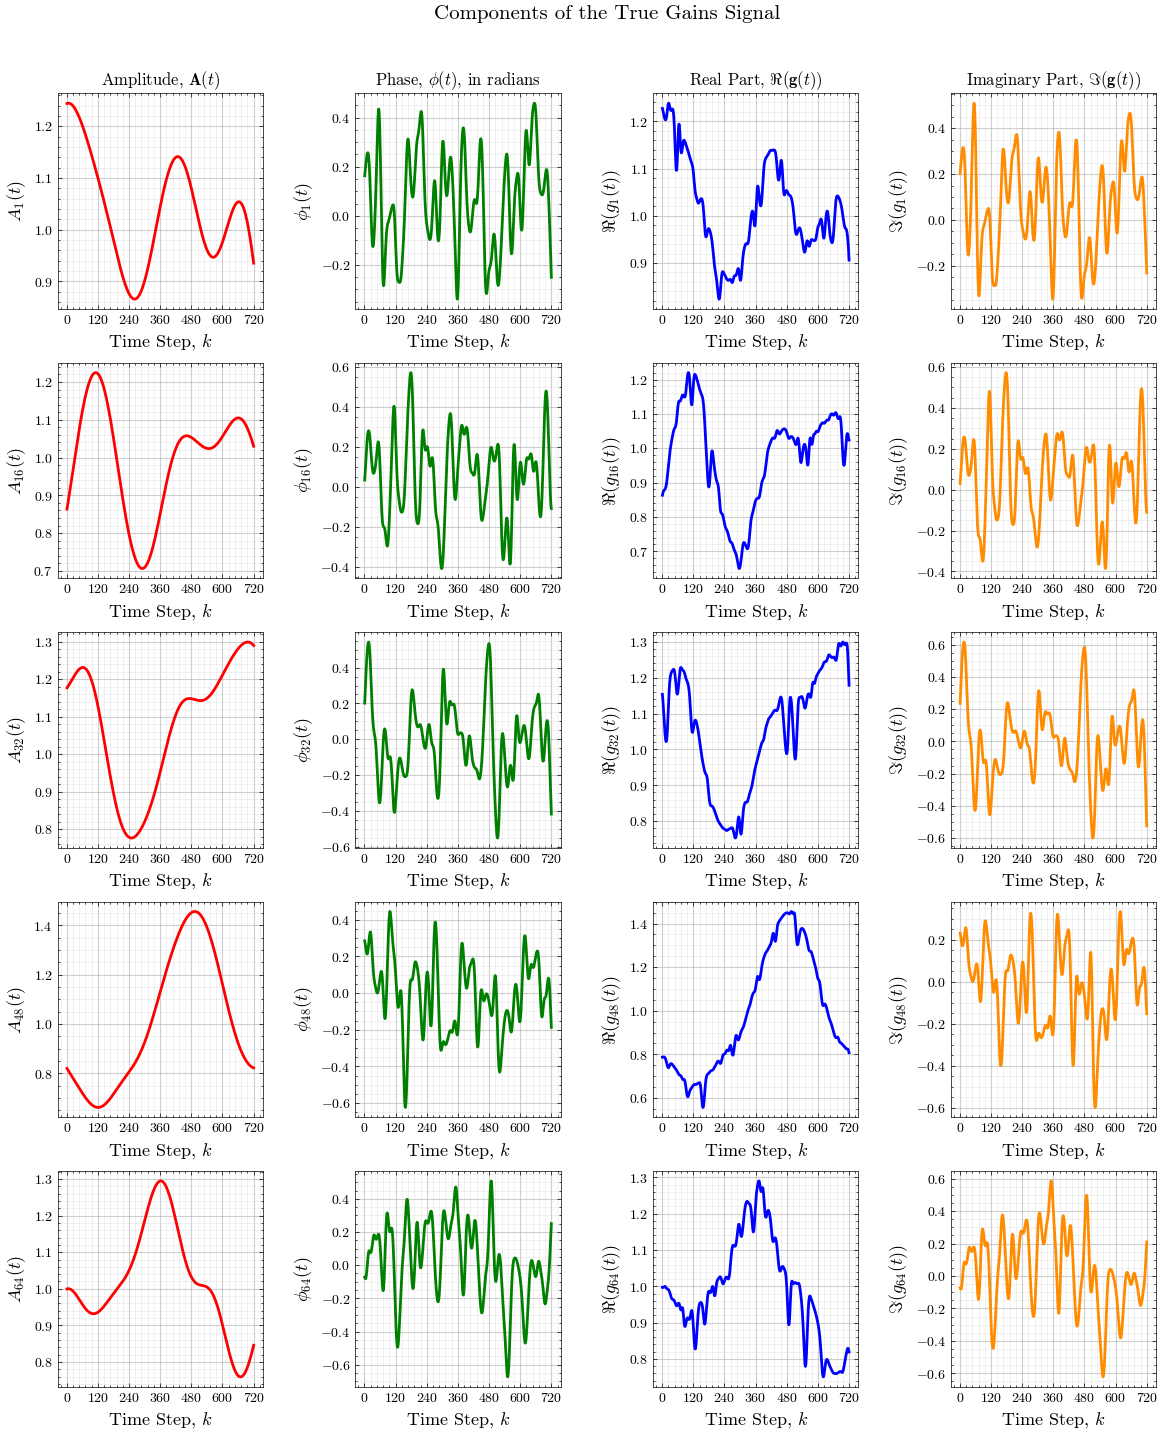

In [59]:
from source.plotting import create_amplitude_and_phase_signal_plot

create_amplitude_and_phase_signal_plot([0, 15, 31, 47, 63], params, show=True, overwrite=True)

[2023-07-24 14:02:43,273 | INFO | source.plotting] Setting seed to 20210331
[2023-07-24 14:02:43,274 | INFO | source.plotting] Overwriting plot
[2023-07-24 14:02:43,330 | INFO | source.plotting] Creating plot
[2023-07-24 14:02:43,331 | INFO | source.plotting] Setting up axes and figure
[2023-07-24 14:02:43,439 | INFO | source.plotting] Configuring axes
[2023-07-24 14:02:43,448 | INFO | source.plotting] Figure and axes setup complete
[2023-07-24 14:02:48,228 | INFO | source.plotting] Saving figure to `meerkat-src-100/plots/ch5-sim-skymodel.png`
[2023-07-24 14:02:52,452 | INFO | source.plotting] Source distribution plot


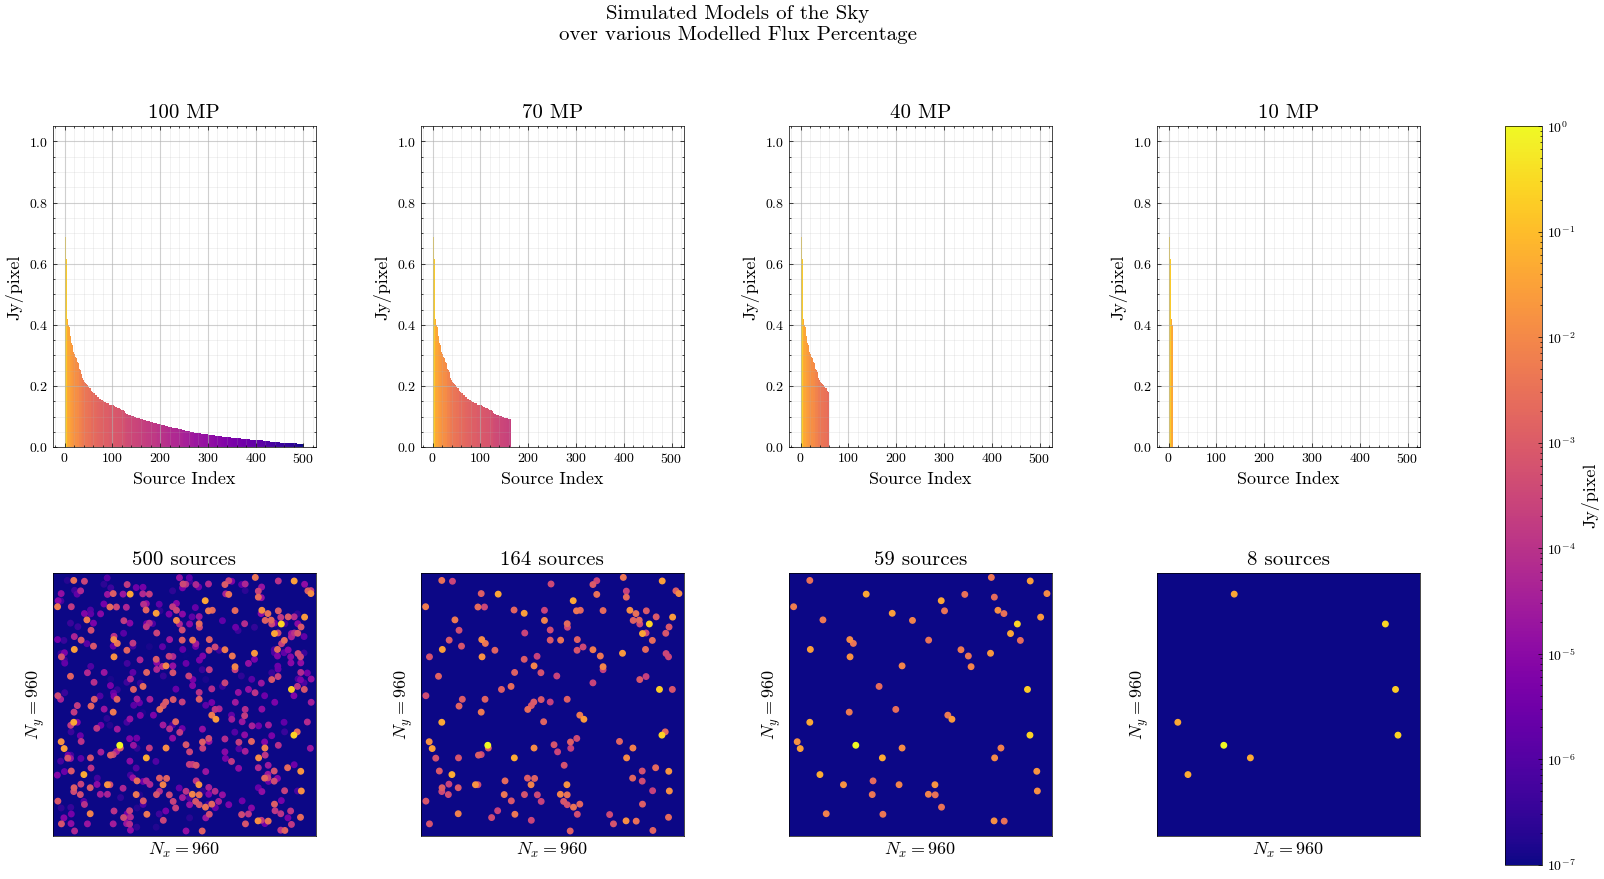

In [60]:
from source.plotting import create_source_distribution_plot

create_source_distribution_plot(params, show=True, overwrite=True)

In [89]:
%%notify
from source.algorithms import run_kalcal_diag_calibration

run_kalcal_diag_calibration(options["kalcal-diag"], params, progress=True, check_mse=True, overwrite=True)

Runs: 0/? [00:00<?, ?it/s]

[2023-07-24 15:29:21,116 | INFO | source.algorithms] Setting seed to 20210331
[2023-07-24 15:29:21,118 | INFO | source.algorithms] Fetching kalcal-diag calibration run options
[2023-07-24 15:29:21,129 | INFO | source.algorithms] Calculated line search process noise parameters
[2023-07-24 15:29:21,130 | INFO | source.algorithms] Updating path data
[2023-07-24 15:29:21,148 | WARNING | source.algorithms] May take long to start. `numba` is compiling the functions.
[2023-07-24 15:29:21,149 | INFO | source.algorithms] Running line-search on 32 points (128 runs)
[2023-07-24 15:29:21,150 | INFO | source.algorithms] Using interval [1e-1.5, 1e1.0].
[2023-07-24 15:29:21,521 | INFO | source.algorithms] kalcal-diag on 100MP with `sigma_f=3.162e-02`, with filter-MSE=0.0714, smoother-MSE=0.069
[2023-07-24 15:29:21,833 | INFO | source.algorithms] kalcal-diag on 100MP with `sigma_f=3.808e-02`, with filter-MSE=0.0704, smoother-MSE=0.068
[2023-07-24 15:29:22,147 | INFO | source.algorithms] kalcal-diag on

[2023-07-24 15:29:38,009 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=1.562e+00`, with filter-MSE=0.0383, smoother-MSE=0.038
[2023-07-24 15:29:38,323 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=1.880e+00`, with filter-MSE=0.0377, smoother-MSE=0.0374
[2023-07-24 15:29:38,654 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=2.264e+00`, with filter-MSE=0.0372, smoother-MSE=0.037
[2023-07-24 15:29:38,988 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=2.726e+00`, with filter-MSE=0.0368, smoother-MSE=0.0367
[2023-07-24 15:29:39,310 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=3.282e+00`, with filter-MSE=0.0365, smoother-MSE=0.0364
[2023-07-24 15:29:39,631 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=3.952e+00`, with filter-MSE=0.0363, smoother-MSE=0.0363
[2023-07-24 15:29:39,948 | INFO | source.algorithms] kalcal-diag on 70MP with `sigma_f=4.758e+00`, with filter-MSE=0.0362, smoother-MSE=0.0361
[

[2023-07-24 15:29:56,121 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=5.125e-01`, with filter-MSE=0.0592, smoother-MSE=0.0574
[2023-07-24 15:29:56,431 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=6.171e-01`, with filter-MSE=0.0581, smoother-MSE=0.0565
[2023-07-24 15:29:56,742 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=7.430e-01`, with filter-MSE=0.0571, smoother-MSE=0.0557
[2023-07-24 15:29:57,059 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=8.946e-01`, with filter-MSE=0.0562, smoother-MSE=0.055
[2023-07-24 15:29:57,372 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=1.077e+00`, with filter-MSE=0.0556, smoother-MSE=0.0546
[2023-07-24 15:29:57,681 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=1.297e+00`, with filter-MSE=0.055, smoother-MSE=0.0542
[2023-07-24 15:29:57,996 | INFO | source.algorithms] kalcal-diag on 10MP with `sigma_f=1.562e+00`, with filter-MSE=0.0547, smoother-MSE=0.054
[2

<IPython.core.display.Javascript object>

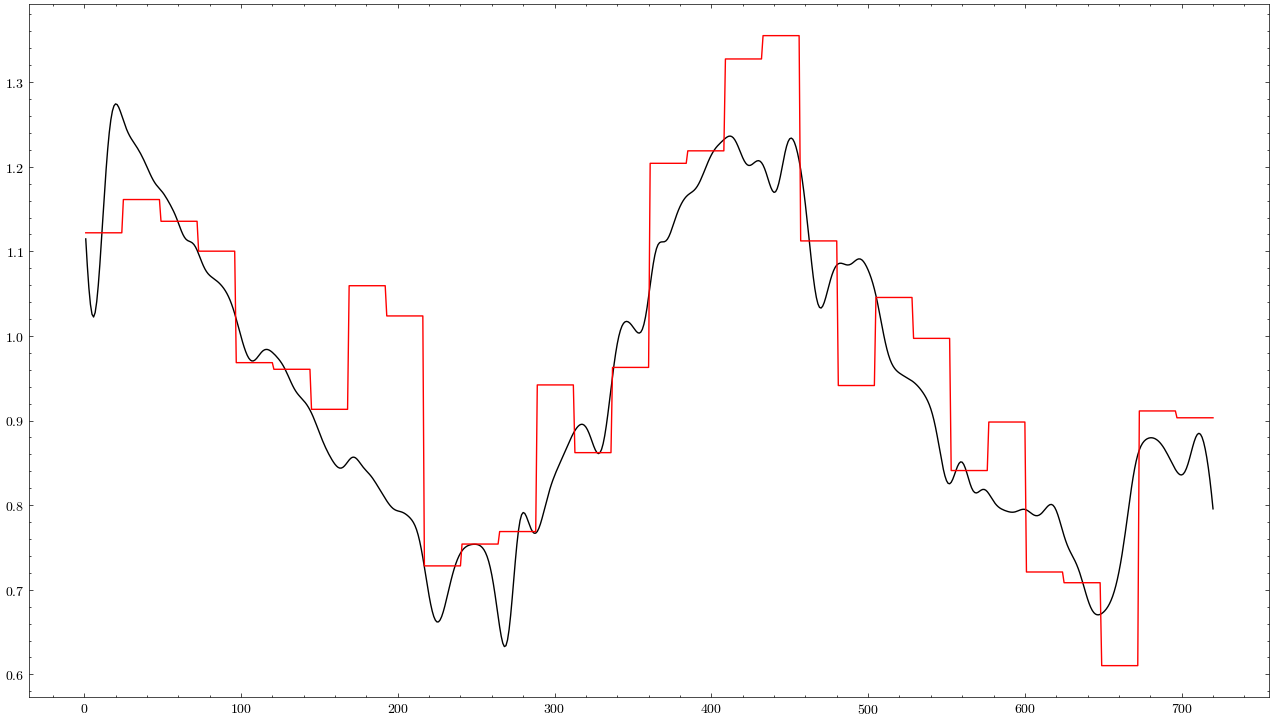

In [95]:
from matplotlib import pyplot as plt
from source.data import load_data

paths = params["paths"]
file_paths = list(paths["gains"]["quartical"]["files"][100].values())

gains = load_data(file_paths[4])["gains"]
true_gains = load_data(paths["gains"]["true"]["files"])["gains"]
ant, ref_ant = 0, 1

tpq = true_gains[:, ant] * true_gains[:, ref_ant].conj()
mpq = gains[:, ant] * gains[:, ref_ant].conj()
times = np.arange(1, tpq.size + 1)

plt.close()
plt.figure(figsize=(16, 9))
plt.plot(times, tpq.real, "k-")
plt.plot(times, mpq.real, "r-")
plt.show()

In [ ]:
from source.algorithms import run_kalcal_full_calibration

run_kalcal_full_calibration(options["kalcal-full"], params, progress=True, check_mse=True, resume=True)

Runs: 0/? [00:00<?, ?it/s]

[2023-07-11 15:43:06,144 | INFO | source.algorithms] Setting seed to 31032021
[2023-07-11 15:43:06,145 | INFO | source.algorithms] Fetching kalcal-full calibration run options
[2023-07-11 15:43:06,170 | INFO | source.algorithms] Calculated line search process noise parameters
[2023-07-11 15:43:06,172 | INFO | source.algorithms] Updating path data
[2023-07-11 15:43:06,200 | INFO | source.algorithms] Checking for stopped runs
[2023-07-11 15:43:06,212 | INFO | source.algorithms] Missing 32 solutions, resuming
[2023-07-11 15:43:06,239 | WARNING | source.algorithms] May take long to start. `numba` is compiling the functions.
[2023-07-11 15:43:06,240 | INFO | source.algorithms] Running line-search on 32 points (32 runs)
[2023-07-11 15:43:06,241 | INFO | source.algorithms] Using interval [1e-3.0, 1e0.0].


In [112]:
%%notify
from source.algorithms import run_quartical_calibration

run_quartical_calibration(options["quartical"], params, progress=True, check_mse=True, overwrite=True)

Runs: 0/? [00:00<?, ?it/s]

[2023-07-24 18:11:10,653 | INFO | source.algorithms] Setting seed to 20210331
[2023-07-24 18:11:10,654 | INFO | source.algorithms] Running QuartiCal setup
[2023-07-24 18:11:10,655 | INFO | source.algorithms] Updating path data
[2023-07-24 18:11:10,663 | INFO | source.algorithms] Fetching QuartiCal option information
[2023-07-24 18:11:10,676 | INFO | source.algorithms] Creating QuartiCal config
[2023-07-24 18:11:10,681 | INFO | source.algorithms] Updating parameter data
[2023-07-24 18:11:10,689 | INFO | source.algorithms] Calculated line search process noise parameters
[2023-07-24 18:11:10,690 | INFO | source.algorithms] Updating path data
[2023-07-24 18:11:10,710 | INFO | source.algorithms] Running line-search on 34 points (136 runs)
[2023-07-24 18:11:18,513 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=1`, 7.77s taken, with MSE=0.261
[2023-07-24 18:11:24,478 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=4`, 5.92s taken, with MSE=0.0915
[2023-07-24 18:11:30,44

[2023-07-24 18:17:36,067 | INFO | source.algorithms] QuartiCal on 70MP with `t-int=336`, 6.07s taken, with MSE=0.0604
[2023-07-24 18:17:42,177 | INFO | source.algorithms] QuartiCal on 70MP with `t-int=348`, 6.07s taken, with MSE=0.0612
[2023-07-24 18:17:47,980 | INFO | source.algorithms] QuartiCal on 70MP with `t-int=360`, 5.76s taken, with MSE=0.0629
[2023-07-24 18:17:53,701 | INFO | source.algorithms] QuartiCal on 70MP with `t-int=720`, 5.68s taken, with MSE=0.073
[2023-07-24 18:18:01,604 | INFO | source.algorithms] QuartiCal on 40MP with `t-int=1`, 7.86s taken, with MSE=0.342
[2023-07-24 18:18:09,113 | INFO | source.algorithms] QuartiCal on 40MP with `t-int=4`, 7.47s taken, with MSE=0.108
[2023-07-24 18:18:15,125 | INFO | source.algorithms] QuartiCal on 40MP with `t-int=8`, 5.97s taken, with MSE=0.0757
[2023-07-24 18:18:20,929 | INFO | source.algorithms] QuartiCal on 40MP with `t-int=12`, 5.77s taken, with MSE=0.0611
[2023-07-24 18:18:26,844 | INFO | source.algorithms] QuartiCal on 

[2023-07-24 18:24:35,944 | INFO | source.algorithms] QuartiCal on 10MP with `t-int=360`, 5.75s taken, with MSE=0.0623
[2023-07-24 18:24:41,754 | INFO | source.algorithms] QuartiCal on 10MP with `t-int=720`, 5.77s taken, with MSE=0.0716
[2023-07-24 18:24:41,758 | INFO | source.algorithms] QuartiCal calibration complete


<IPython.core.display.Javascript object>

In [98]:
from source.imaging import run_kalcal_diag_flux_extractor

run_kalcal_diag_flux_extractor(params, check_metric=True, progress=True, overwrite=True)

Images: 0/? [00:00<?, ?it/s]

[2023-07-24 15:48:55,396 | INFO | source.imaging] Setting seed to 20210331
[2023-07-24 15:48:55,397 | INFO | source.imaging] Retrieved line search sigma-fs parameters
[2023-07-24 15:48:55,398 | INFO | source.imaging] Updating path data
[2023-07-24 15:48:55,415 | INFO | source.imaging] Overwriting previous solutions and images
[2023-07-24 15:48:55,435 | INFO | source.imaging] Running line-search on 32 points (128 runs)
[2023-07-24 15:49:10,041 | INFO | source.imaging] kalcal-diag-filter on 100MP with `sigma-f=0.0316`, 14.6s taken, with Flux MSE=4.19e-05, Residual RMS=0.00644, and Corrected RMS=0.0251.
[2023-07-24 15:49:24,756 | INFO | source.imaging] kalcal-diag-smoother on 100MP with `sigma-f=0.0316`, 14.7s taken, with Flux MSE=4.1e-05, Residual RMS=0.00639, and Corrected RMS=0.0252.
[2023-07-24 15:49:39,156 | INFO | source.imaging] kalcal-diag-filter on 100MP with `sigma-f=0.0381`, 14.4s taken, with Flux MSE=4.15e-05, Residual RMS=0.00641, and Corrected RMS=0.0252.
[2023-07-24 15:49:5

[2023-07-24 15:59:21,393 | INFO | source.imaging] kalcal-diag-filter on 100MP with `sigma-f=1.56`, 14.4s taken, with Flux MSE=2.86e-05, Residual RMS=0.00526, and Corrected RMS=0.0254.
[2023-07-24 15:59:35,924 | INFO | source.imaging] kalcal-diag-smoother on 100MP with `sigma-f=1.56`, 14.5s taken, with Flux MSE=2.86e-05, Residual RMS=0.00525, and Corrected RMS=0.0254.
[2023-07-24 15:59:50,380 | INFO | source.imaging] kalcal-diag-filter on 100MP with `sigma-f=1.88`, 14.4s taken, with Flux MSE=2.84e-05, Residual RMS=0.00524, and Corrected RMS=0.0254.
[2023-07-24 16:00:04,822 | INFO | source.imaging] kalcal-diag-smoother on 100MP with `sigma-f=1.88`, 14.4s taken, with Flux MSE=2.84e-05, Residual RMS=0.00524, and Corrected RMS=0.0254.
[2023-07-24 16:00:19,535 | INFO | source.imaging] kalcal-diag-filter on 100MP with `sigma-f=2.26`, 14.7s taken, with Flux MSE=2.82e-05, Residual RMS=0.00523, and Corrected RMS=0.0254.
[2023-07-24 16:00:34,253 | INFO | source.imaging] kalcal-diag-smoother on 10

[2023-07-24 16:10:13,340 | INFO | source.imaging] kalcal-diag-smoother on 70MP with `sigma-f=0.244`, 14.5s taken, with Flux MSE=3.78e-05, Residual RMS=0.00582, and Corrected RMS=0.0255.
[2023-07-24 16:10:27,747 | INFO | source.imaging] kalcal-diag-filter on 70MP with `sigma-f=0.294`, 14.4s taken, with Flux MSE=3.66e-05, Residual RMS=0.00578, and Corrected RMS=0.0255.
[2023-07-24 16:10:42,161 | INFO | source.imaging] kalcal-diag-smoother on 70MP with `sigma-f=0.294`, 14.4s taken, with Flux MSE=3.69e-05, Residual RMS=0.00575, and Corrected RMS=0.0255.
[2023-07-24 16:10:56,491 | INFO | source.imaging] kalcal-diag-filter on 70MP with `sigma-f=0.353`, 14.3s taken, with Flux MSE=3.57e-05, Residual RMS=0.00571, and Corrected RMS=0.0255.
[2023-07-24 16:11:10,896 | INFO | source.imaging] kalcal-diag-smoother on 70MP with `sigma-f=0.353`, 14.4s taken, with Flux MSE=3.6e-05, Residual RMS=0.00568, and Corrected RMS=0.0255.
[2023-07-24 16:11:25,433 | INFO | source.imaging] kalcal-diag-filter on 70M

[2023-07-24 16:21:04,306 | INFO | source.imaging] kalcal-diag-filter on 40MP with `sigma-f=0.0458`, 14.5s taken, with Flux MSE=4.15e-05, Residual RMS=0.00642, and Corrected RMS=0.0252.
[2023-07-24 16:21:18,837 | INFO | source.imaging] kalcal-diag-smoother on 40MP with `sigma-f=0.0458`, 14.5s taken, with Flux MSE=4.09e-05, Residual RMS=0.00636, and Corrected RMS=0.0253.
[2023-07-24 16:21:33,332 | INFO | source.imaging] kalcal-diag-filter on 40MP with `sigma-f=0.0552`, 14.5s taken, with Flux MSE=4.12e-05, Residual RMS=0.00638, and Corrected RMS=0.0252.
[2023-07-24 16:21:47,700 | INFO | source.imaging] kalcal-diag-smoother on 40MP with `sigma-f=0.0552`, 14.3s taken, with Flux MSE=4.07e-05, Residual RMS=0.00632, and Corrected RMS=0.0253.
[2023-07-24 16:22:02,160 | INFO | source.imaging] kalcal-diag-filter on 40MP with `sigma-f=0.0665`, 14.4s taken, with Flux MSE=4.08e-05, Residual RMS=0.00633, and Corrected RMS=0.0253.
[2023-07-24 16:22:16,620 | INFO | source.imaging] kalcal-diag-smoother 

[2023-07-24 16:31:56,035 | INFO | source.imaging] kalcal-diag-smoother on 40MP with `sigma-f=2.73`, 14.4s taken, with Flux MSE=3.09e-05, Residual RMS=0.00536, and Corrected RMS=0.0256.
[2023-07-24 16:32:10,592 | INFO | source.imaging] kalcal-diag-filter on 40MP with `sigma-f=3.28`, 14.5s taken, with Flux MSE=3.09e-05, Residual RMS=0.00536, and Corrected RMS=0.0256.
[2023-07-24 16:32:25,137 | INFO | source.imaging] kalcal-diag-smoother on 40MP with `sigma-f=3.28`, 14.5s taken, with Flux MSE=3.09e-05, Residual RMS=0.00535, and Corrected RMS=0.0256.
[2023-07-24 16:32:39,756 | INFO | source.imaging] kalcal-diag-filter on 40MP with `sigma-f=3.95`, 14.6s taken, with Flux MSE=3.08e-05, Residual RMS=0.00535, and Corrected RMS=0.0256.
[2023-07-24 16:32:54,188 | INFO | source.imaging] kalcal-diag-smoother on 40MP with `sigma-f=3.95`, 14.4s taken, with Flux MSE=3.08e-05, Residual RMS=0.00535, and Corrected RMS=0.0256.
[2023-07-24 16:33:08,590 | INFO | source.imaging] kalcal-diag-filter on 40MP wi

[2023-07-24 16:42:48,974 | INFO | source.imaging] kalcal-diag-filter on 10MP with `sigma-f=0.512`, 14.4s taken, with Flux MSE=3.73e-05, Residual RMS=0.00611, and Corrected RMS=0.0256.
[2023-07-24 16:43:03,352 | INFO | source.imaging] kalcal-diag-smoother on 10MP with `sigma-f=0.512`, 14.4s taken, with Flux MSE=3.71e-05, Residual RMS=0.00608, and Corrected RMS=0.0256.
[2023-07-24 16:43:17,743 | INFO | source.imaging] kalcal-diag-filter on 10MP with `sigma-f=0.617`, 14.4s taken, with Flux MSE=3.72e-05, Residual RMS=0.00607, and Corrected RMS=0.0256.
[2023-07-24 16:43:32,109 | INFO | source.imaging] kalcal-diag-smoother on 10MP with `sigma-f=0.617`, 14.3s taken, with Flux MSE=3.69e-05, Residual RMS=0.00605, and Corrected RMS=0.0256.
[2023-07-24 16:43:46,523 | INFO | source.imaging] kalcal-diag-filter on 10MP with `sigma-f=0.743`, 14.4s taken, with Flux MSE=3.71e-05, Residual RMS=0.00604, and Corrected RMS=0.0256.
[2023-07-24 16:44:01,048 | INFO | source.imaging] kalcal-diag-smoother on 10

In [113]:
from source.imaging import run_quartical_flux_extractor

run_quartical_flux_extractor(params, check_metric=True, progress=True, overwrite=True)

Images: 0/? [00:00<?, ?it/s]

[2023-07-24 18:24:41,840 | INFO | source.imaging] Setting seed to 20210331
[2023-07-24 18:24:41,841 | INFO | source.imaging] Retrieved line search t-ints parameters
[2023-07-24 18:24:41,842 | INFO | source.imaging] Updating path data
[2023-07-24 18:24:41,884 | INFO | source.imaging] Running line-search on 34 points (136 runs)
[2023-07-24 18:24:56,618 | INFO | source.imaging] QuartiCal on 100MP with `t-int=1`, 14.7s taken, with Flux MSE=1.53e-05, Residual RMS=0.00411, and Corrected RMS=0.0248.
[2023-07-24 18:25:11,192 | INFO | source.imaging] QuartiCal on 100MP with `t-int=4`, 14.5s taken, with Flux MSE=1.82e-05, Residual RMS=0.00448, and Corrected RMS=0.025.
[2023-07-24 18:25:26,104 | INFO | source.imaging] QuartiCal on 100MP with `t-int=8`, 14.9s taken, with Flux MSE=1.9e-05, Residual RMS=0.00456, and Corrected RMS=0.0251.
[2023-07-24 18:25:40,807 | INFO | source.imaging] QuartiCal on 100MP with `t-int=12`, 14.6s taken, with Flux MSE=2.01e-05, Residual RMS=0.0046, and Corrected RMS=0.

[2023-07-24 18:36:22,816 | INFO | source.imaging] QuartiCal on 70MP with `t-int=132`, 14.4s taken, with Flux MSE=2.89e-05, Residual RMS=0.00529, and Corrected RMS=0.0252.
[2023-07-24 18:36:37,220 | INFO | source.imaging] QuartiCal on 70MP with `t-int=144`, 14.4s taken, with Flux MSE=2.94e-05, Residual RMS=0.00534, and Corrected RMS=0.0252.
[2023-07-24 18:36:51,677 | INFO | source.imaging] QuartiCal on 70MP with `t-int=156`, 14.4s taken, with Flux MSE=2.83e-05, Residual RMS=0.00533, and Corrected RMS=0.0252.
[2023-07-24 18:37:06,214 | INFO | source.imaging] QuartiCal on 70MP with `t-int=168`, 14.5s taken, with Flux MSE=2.99e-05, Residual RMS=0.00539, and Corrected RMS=0.0252.
[2023-07-24 18:37:20,719 | INFO | source.imaging] QuartiCal on 70MP with `t-int=180`, 14.5s taken, with Flux MSE=2.99e-05, Residual RMS=0.00546, and Corrected RMS=0.0252.
[2023-07-24 18:37:35,215 | INFO | source.imaging] QuartiCal on 70MP with `t-int=192`, 14.5s taken, with Flux MSE=3.02e-05, Residual RMS=0.00547, 

[2023-07-24 18:48:13,497 | INFO | source.imaging] QuartiCal on 40MP with `t-int=312`, 14.5s taken, with Flux MSE=3.33e-05, Residual RMS=0.00576, and Corrected RMS=0.0252.
[2023-07-24 18:48:28,277 | INFO | source.imaging] QuartiCal on 40MP with `t-int=324`, 14.7s taken, with Flux MSE=3.36e-05, Residual RMS=0.00579, and Corrected RMS=0.0251.
[2023-07-24 18:48:42,894 | INFO | source.imaging] QuartiCal on 40MP with `t-int=336`, 14.6s taken, with Flux MSE=3.35e-05, Residual RMS=0.00582, and Corrected RMS=0.0251.
[2023-07-24 18:48:57,394 | INFO | source.imaging] QuartiCal on 40MP with `t-int=348`, 14.5s taken, with Flux MSE=3.38e-05, Residual RMS=0.00584, and Corrected RMS=0.0251.
[2023-07-24 18:49:12,256 | INFO | source.imaging] QuartiCal on 40MP with `t-int=360`, 14.8s taken, with Flux MSE=3.43e-05, Residual RMS=0.00588, and Corrected RMS=0.0252.
[2023-07-24 18:49:26,730 | INFO | source.imaging] QuartiCal on 40MP with `t-int=720`, 14.4s taken, with Flux MSE=3.99e-05, Residual RMS=0.00626, 

[2023-07-24 19:01:24,085 | INFO | source.plotting] Setting seed to 20210331
[2023-07-24 19:01:24,086 | INFO | source.plotting] Overwriting previous plot
[2023-07-24 19:01:24,087 | INFO | source.plotting] Creating plot
[2023-07-24 19:01:24,089 | INFO | source.plotting] Setting up axes and figure
[2023-07-24 19:01:24,154 | INFO | source.plotting] Configuring axes
[2023-07-24 19:01:24,223 | INFO | source.plotting] Figure and axes setup complete
[2023-07-24 19:01:24,367 | INFO | source.plotting] kalcal-diag smoother on `gains-mse` for 100MP: sigma-fs['31'] = 10 (10^(1)) --> 0.0349 (+- 0.000293)
[2023-07-24 19:01:24,368 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-24 19:01:24,513 | INFO | source.plotting] kalcal-diag smoother on `gains-mse` for 70MP: sigma-fs['31'] = 10 (10^(1)) --> 0.0359 (+- 0.000283)
[2023-07-24 19:01:24,515 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-24 19:01:24,662 | INFO

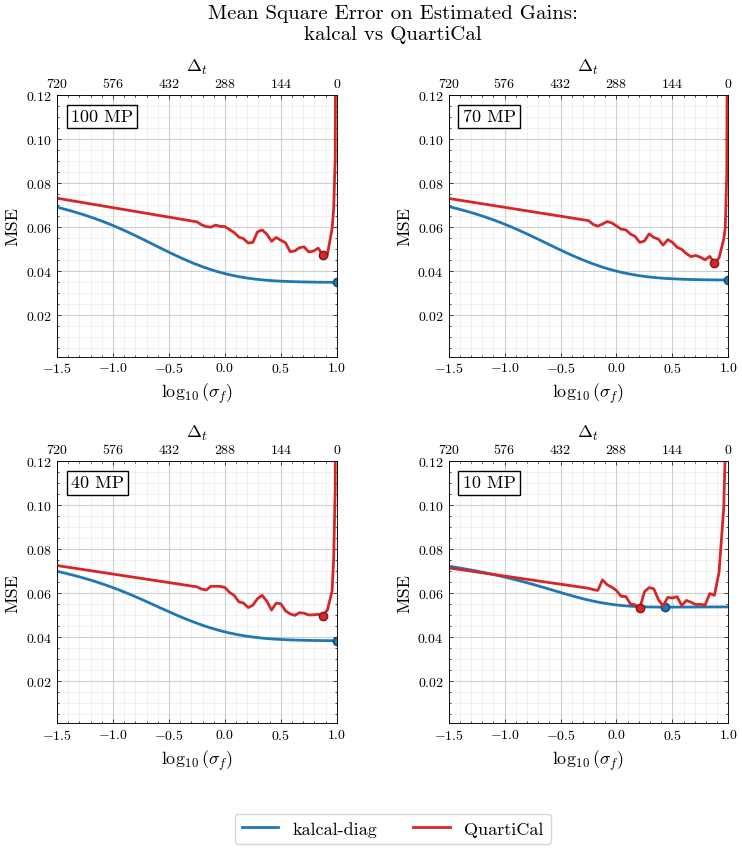

In [114]:
from source.plotting import create_standard_plot

options = {
        "title" : "Mean Square Error on Estimated Gains",
        "metric" : "gains-mse",
        "name" : "ch5-gains-mse-all",
        "algorithms" : ["quartical", "diag-smoother"],
        "size" : 11,
        "subplot_adjust" : {
            "top": 0.875,
            "hspace": 0.4,
            "bottom": 0.15
        },
        "limit_adjust" : {
            "mode": "explicit",
            "adjust": (0.001, 0.12)
        },
        "show": True,
        "overwrite": True
}


create_standard_plot(params, **options)

[2023-07-24 12:52:04,798 | INFO | source.plotting] Setting seed to 20210331
[2023-07-24 12:52:04,799 | INFO | source.plotting] Overwriting previous plot
[2023-07-24 12:52:04,800 | INFO | source.plotting] Creating plot
[2023-07-24 12:52:04,801 | INFO | source.plotting] Setting up axes and figure
[2023-07-24 12:52:04,860 | INFO | source.plotting] Configuring axes
[2023-07-24 12:52:04,924 | INFO | source.plotting] Figure and axes setup complete
[2023-07-24 12:52:06,197 | INFO | source.plotting] kalcal-diag smoother on `gains-mse` for 100MP: sigma-fs['217'] = 2.06 (10^(0.314)) --> 0.0364 (+- 0.000199)
[2023-07-24 12:52:06,198 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-24 12:52:07,455 | INFO | source.plotting] kalcal-diag smoother on `gains-mse` for 70MP: sigma-fs['200'] = 1.49 (10^(0.172)) --> 0.0403 (+- 0.00016)
[2023-07-24 12:52:07,457 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-24 12:52:

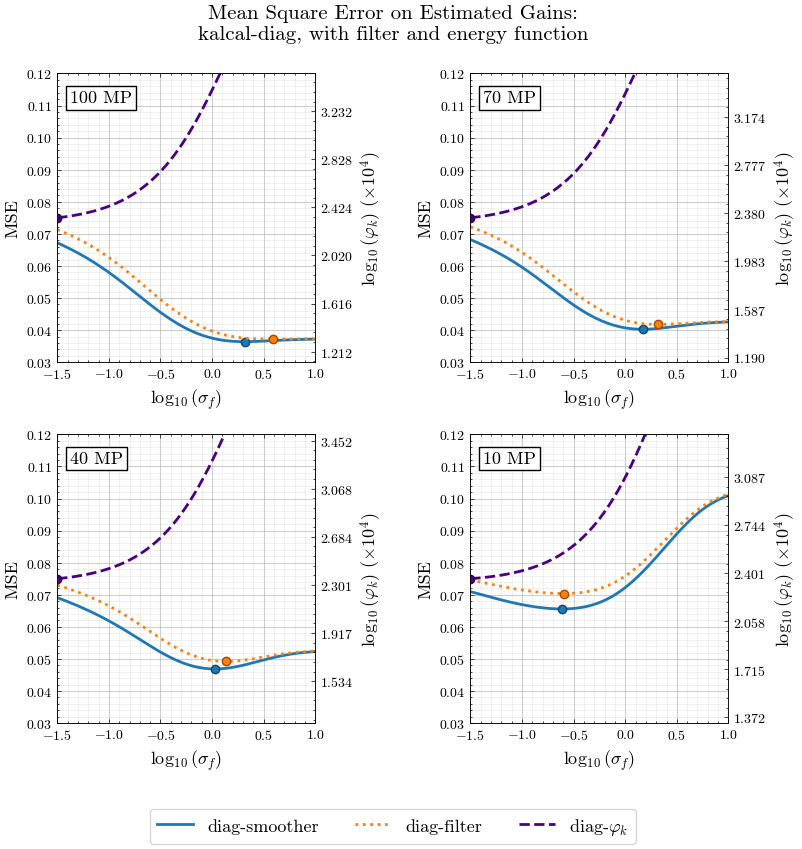

In [49]:
from source.plotting import create_standard_plot

options = {
        "title" : "Mean Square Error on Estimated Gains",
        "metric" : "gains-mse",
        "name" : "ch5-gains-mse-diag",
        "algorithms" : ["diag-smoother", "diag-filter", "diag-energy"],
        "size" : 11,
        "subplot_adjust" : {
            "top": 0.9,
            "hspace": 0.25,
            "bottom": 0.15,
            "wspace": 0.6,
        },
        "limit_adjust" : {
            "mode": "explicit",
            "adjust": {
                "main": (0.03, 0.12),
                "energy": {
                    100: (1.124, 3.548),
                    70: (1.152, 3.532),
                    40: (1.200, 3.501),
                    10: (1.332, 3.390)
                }
            }
        },
        "show": True,
        "overwrite": True
}

create_standard_plot(params, **options)

In [ ]:
from source.plotting import create_standard_plot

options = {
        "title" : "Mean Square Error on Estimated Gains",
        "metric" : "gains-mse",
        "name" : "ch5-gains-mse-full",
        "algorithms" : ["full-smoother", "full-filter", "full-energy"],
        "size" : 11,
        "subplot_adjust" : {
            "top": 0.9,
            "hspace": 0.25,
            "bottom": 0.15,
            "wspace": 0.6,
        },
        "limit_adjust" : {
            "mode": "explicit",
            "adjust": {
                "main": {
                    100: (0.01, 0.1),
                    75: (0.01, 0.1),
                    50: (0.01, 0.1),
                    25: (0.01, 0.1)
                },
                "energy": {
                    100: (6.16, 6.196),
                    75: (6.16, 6.196),
                    50: (6.16, 6.196),
                    25: (6.16, 6.196)
                }
            }
        },
        "show": True,
        "overwrite": True
}

create_standard_plot(params, **options)

[2023-07-24 22:03:00,088 | INFO | source.plotting] Setting seed to 20210331
[2023-07-24 22:03:00,089 | INFO | source.plotting] Overwriting previous plot
[2023-07-24 22:03:00,090 | INFO | source.plotting] Creating plot
[2023-07-24 22:03:00,093 | INFO | source.plotting] Setting up axes and figure
[2023-07-24 22:03:00,157 | INFO | source.plotting] Configuring axes
[2023-07-24 22:03:00,225 | INFO | source.plotting] Figure and axes setup complete
[2023-07-24 22:03:00,887 | INFO | source.plotting] kalcal-diag smoother on `flux-mse` for 100MP: sigma-fs['31'] = 10 (10^(1)) --> 2.78e-05 (+- 4.86e-11)
[2023-07-24 22:03:00,888 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-24 22:03:01,527 | INFO | source.plotting] kalcal-diag smoother on `flux-mse` for 70MP: sigma-fs['31'] = 10 (10^(1)) --> 3.03e-05 (+- 4.41e-11)
[2023-07-24 22:03:01,528 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-24 22:03:02,165 | IN

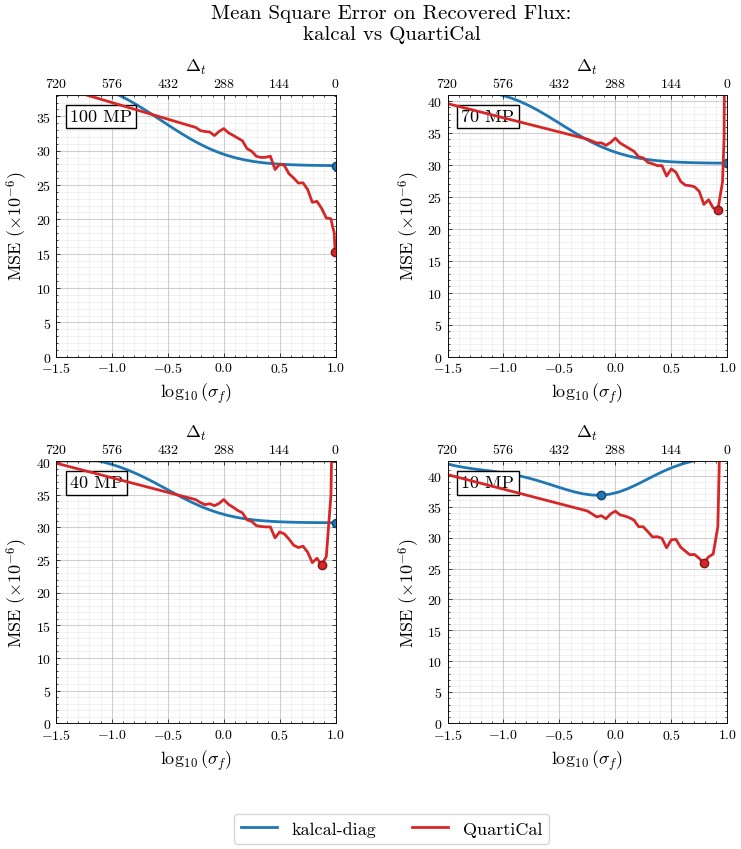

In [166]:
from source.plotting import create_standard_plot

options = {
        "title" : "Mean Square Error on Recovered Flux",
        "metric" : "flux-mse",
        "name" : "ch5-fluxes-mse-all",
        "algorithms" : ["quartical", "diag-smoother"],
        "size" : 11,
        "subplot_adjust" : {
            "top": 0.875,
            "hspace": 0.4,
            "bottom": 0.15
        },
        "limit_adjust" : {
#             "mode": "explicit",
#             "adjust": (0.15, 1.2)
        },
        "show": True,
        "overwrite": True,
        "offset": -6
}

create_standard_plot(params, **options)

[2023-07-25 09:26:21,622 | INFO | source.plotting] Setting seed to 20210331
[2023-07-25 09:26:21,625 | INFO | source.plotting] Overwriting previous plot
[2023-07-25 09:26:21,626 | INFO | source.plotting] Creating plot
[2023-07-25 09:26:21,628 | INFO | source.plotting] Setting up axes and figure
[2023-07-25 09:26:21,688 | INFO | source.plotting] Configuring axes
[2023-07-25 09:26:21,756 | INFO | source.plotting] Figure and axes setup complete
[2023-07-25 09:26:22,470 | INFO | source.plotting] kalcal-diag smoother on `flux-psi-1` for 100MP: sigma-fs['4'] = 0.0665 (10^(-1.18)) --> 0.00729 (+- 5.7e-06)
[2023-07-25 09:26:22,473 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-25 09:26:23,158 | INFO | source.plotting] kalcal-diag smoother on `flux-psi-1` for 70MP: sigma-fs['0'] = 0.0316 (10^(-1.5)) --> 0.00794 (+- 3.81e-05)
[2023-07-25 09:26:23,159 | INFO | source.plotting] Plotting line: (log, linear), line-width=2.0, line-style=-
[2023-07-25 09:

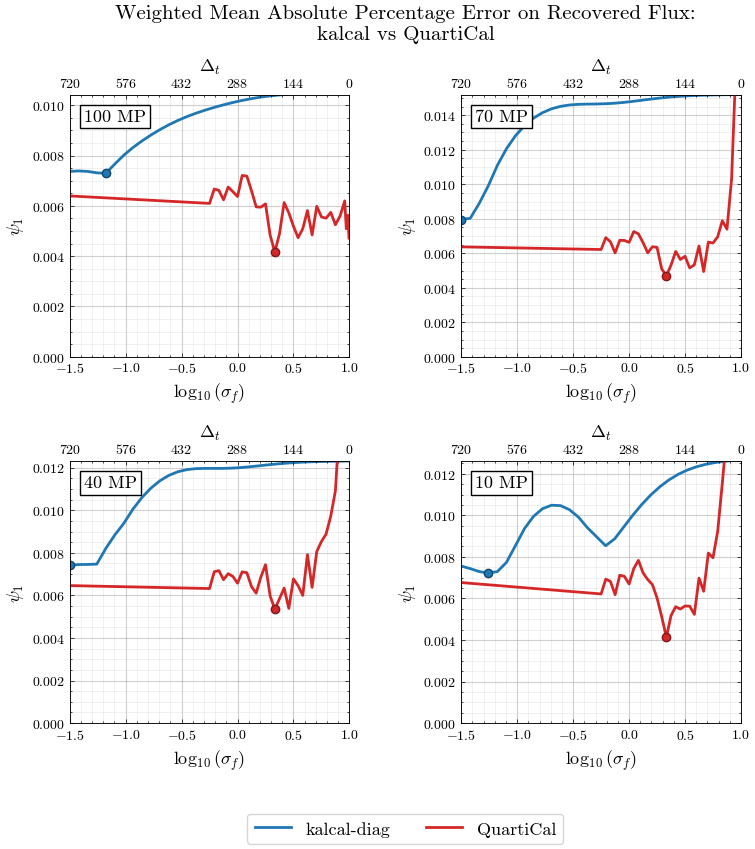

In [170]:
from source.plotting import create_standard_plot

options = {
        "title" : "Weighted Mean Absolute Percentage Error on Recovered Flux",
        "metric" : "flux-psi-1",
        "name" : "ch5-fluxes-psi-1-full",
        "algorithms" : ["quartical", "diag-smoother"],
        "size" : 11,
        "subplot_adjust" : {
            "top": 0.875,
            "hspace": 0.4,
            "bottom": 0.15
        },
        "limit_adjust" : {
#             "mode": "explicit",
#             "adjust": {
#                 100: (0.03, 0.08),
#                 70: (0.03, 0.08),
#                 40: (0.03, 0.08),
#                 10: (0.03, 0.08)
#             }
        },
        "show": True,
        "overwrite": True
}

create_standard_plot(params, **options)

In [176]:
from matplotlib import pyplot as plt
import numpy as np
from source.data import load_data
from source.metrics import flux_ratio

paths = params["paths"]
percents = params["percents"]
t_ints = params["kalcal-diag"]["sigma-fs"]

true_model = load_data(params["paths"]["fluxes"]["true"]["files"][100])
Ix = true_model["Ix"]
Iy = true_model["Iy"]
true_flux = true_model["model"][Ix, Iy]
n_src = len(true_flux)
n_points = len(t_ints)

cmap1 = plt.cm.get_cmap("Reds")
cmap2 = plt.cm.get_cmap("Blues_r")
tophalf = np.zeros((256, 4))
bothalf = np.zeros((256, 4))

for i in np.arange(256):
    tophalf[i] = cmap1(i)
    bothalf[i] = cmap2(i)

all_colors = np.vstack((bothalf, tophalf))
cmap = LinearSegmentedColormap.from_list('two_slope_cmap', all_colors)
if scale == "Major":
    vmin = 0.5
    vcenter = 1.0
    vmax = 1.5
else:
    vmin = 0.9
    vcenter = 1.0
    vmax = 1.1

divnorm = TwoSlopeNorm(vmin=vmin - (vcenter - vmin)/127, vcenter=vcenter, vmax=vmax)

sources = np.arange(1, len(data) + 1)
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
axes = axes.flatten()

for percent, ax in zip(percents, axes):
    img = np.zeros((n_points, n_src), dtype=np.float64)
    file_paths = paths["fluxes"]["kalcal-diag"]["smoother"]["files"][percent]
    for i, t_int in enumerate(t_ints):
        flux = load_data(file_paths[t_int])["flux"]
        img[i] = flux_ratio(flux, true_flux)
    
    ax.imshow(img, cmap="inferno", interpolation='nearest', aspect='auto')
    
plt.show()

/tmp/ipykernel_262349/2794259455.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = plt.cm.get_cmap("Reds")
/tmp/ipykernel_262349/2794259455.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = plt.cm.get_cmap("Blues_r")


NameError: name 'LinearSegmentedColormap' is not defined